**<h1 style="text-align: center;">Stroke Prediction Project</h1>**

## 👋🏼 **Introduction**

<p style="text-align: justify;">I am a data scientist for a company called TrackFit. And it is building an application which tracks the health data for the user. And they are planning to add an additonal function where it will take some inputs and track the bmi and based on these features it will try to predict whether user has chances of getting a stroke or not. Strokes are one of the leading cause of deaths all round the world. The aim of our company is reduce the number of deaths that are caused due to heart stroke. But giving this stroke prediction function to the user, we are make the user beware of the potential harm and inform him/her to get a doctors opinion at the earliest, which will result is reducing the cause of deaths.</p>


## 🧿 **Objective**
 <p style="text-align: justify;">Then objective of this project is to build an machine  learning module which will predict whether an user has chances of getting a hear stroke. For this my company are given me a dataset which has many metrics which has impact on the cause of stroke. So I will be using these features and building an accurate machine learning model. I have specified the steps we will be following in the **Table of content** so that it will be easier to navigate.
 
 </p>

**About the data**  
This dataset contains 12 columns. This data set is from Kaggle. You can [**click here**](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset) to view the dataset on kaggle.

## **Table of Content**

##### ⬇ [**Importing Libraries**](#library)
##### 📊 [**Importing Dataset**](#dataset)
##### 🗺️ [**Exploring the dataset**](#exploration)
##### 💭 [**My taughts on the dataset**](#thoughts)
##### ⚙️ [**Pre-processing the data**](#processing)
##### 🔧 [**Feature Engineering**](#feature)
##### 🤖 [**Model Training**](#model)
##### ✅ [**Model Assessment**](#assess)
##### 💡 [**Conclusion**](#conclusion)






## ***Let's begin....***

<a id='library'></a>
## ⬇ <span style="color: #20479b; font-weight: bold;">Importing Libraries</span>

I start by importing the necessary libraries for my Exploratory Data Analysis tasks in Python.

In [1]:
import pandas as pd
import numpy as np
import sklearn.model_selection
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

<a id='dataset'></a>  

## 📊 <span style="color: #20479b; font-weight: bold;">Importing Dataset</span>

In [2]:
df = pd.read_csv('/Users/jasonjoelpinto/Documents/GitHub/python-datascience-projects/010. stroke_prediction/dataset/healthcare-dataset-stroke-data.csv')

print("No. of rows.   :", df.shape[0])
print("No. of cols.   :", df.shape[1])  
print("="*30)

df.head(5)

No. of rows.   : 5110
No. of cols.   : 12


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<a id='exploration'></a>
## 🗺️ <span style="color: #20479b; font-weight: bold;">Exploring the dataset</span>

**Note:**
For EDA and Data Pre-processing I will be using the main datafram. Once dataframe is cleaned. I will be splitting it into `train` and  `test` split. Here's why
1. I do not want the just the `test` data to be cleaned and `train` data having unwanted data and error.
2. If I clean only the `test` data then my data is not generalized. Hence while my model tries to predict it will have different issues during training and testing.

After loading the dataset into the DataFrame `df`, I will check the `df` shape using the `.shape` attribute.

In [3]:
df.shape

(5110, 12)

As you can see above there are 5110 rows and 12 columns

I will use `.info` method to get a shortsummary of the DataFrame. It will include the number of non-null values, Data Types, and Memory Usage etc.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


I can see that the 
- count in the **Non-Null** column is less than the total rows for columns `bmi` i.e. 5110
- that means that there are many NULL values in the dataset. 
- which we will take care in the data cleaning part.

I will use `dtypes` attribute to get the datatypes of the columns.  
I will also get the same details in `.info()` attribute above. But I like to view it seperately we get a getter understanding.

In [5]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

I will use `df.describe()` 
- to generate a descriptive statistics of numerical columns of the DataFrame. 
- It will provide us various functions such as mean, count, Standard Deviation, Min, Max and percentiles.
- I have used **Transpose** here as I want the columns of my DataFrame as the index.
- This especially helps when I have many numrical columns.

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


1. **age**:
   - As we can see here we have data from the age of 0.8 to 82 years.
   - Average age is near 43 years.
   - MIN is 0.08, we will have to check why there is entry below 1.

2. **hypertension**:
   - The hypertension values ranges between 0 and 1. 0 means no hypertension 1 means person has hypertension.
   - Average values of this colum in 0.09 which means that not many people have hypertension.

3. **heart_disease**:
   - Average values of this colum in 0.05 which means that not many people have heart disease.

4. **avg_glucose_level**:
   - The average glucose level of people in this data ranges between 55 to 271 mmol/L.
   - Mean is 106 mmol/L.

5. **bmi**:
   - bmi is ranging from 10 to 97 bmi.

Now I will check now many null values are there in the dataset.

In [7]:
print("Number of rows.   :", df.shape[0])
print("="*30)

df.isnull().sum()

Number of rows.   : 5110


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Now I am going to check how much percentage of the columns are null. If they are negligible percentage then we can just drop the columns. Otherwise I will fill the na values with the meaninfull values.

In [8]:
null_percentage = {}
for column in df:
    null_percentage[column] = round(( ( df[column].isnull().sum() ) / len(df)) * 100,2)
np_df = pd.DataFrame( list( null_percentage.items() ),  columns=[  'column_name'  , 'null_percentage' ])
np_df

,column_name,null_percentage
0,id,0.00
1,gender,0.00
2,age,0.00
3,hypertension,0.00
4,heart_disease,0.00
5,ever_married,0.00
6,work_type,0.00
7,Residence_type,0.00
8,avg_glucose_level,0.00
9,bmi,3.93


As the null percentage of column `bmi` is negligible when compared to the size of the dataset, we can drop these null rows as bmi cannot be `NULL`.

In [9]:
print(df["gender"].unique())
print(df["work_type"].unique())
print(df["Residence_type"].unique())
print(df["smoking_status"].unique())

['Male' 'Female' 'Other']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


Values look fine here, there are no unwanted/error values.

Using `.duplicated().any()` I will be checking if there are any duplicate entries.

In [10]:
df.duplicated().any()

False

There are no duplicates.

<Axes: xlabel='age', ylabel='Count'>

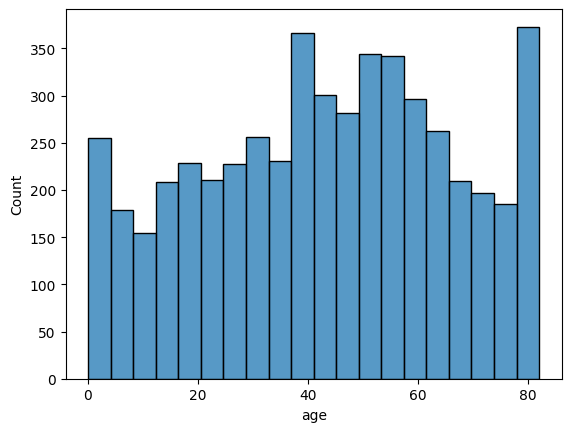

In [11]:
sns.histplot(df, x='age')

Good to see data for all age groups.

Now let's check why there was data for age less than 1 year old's.

In [12]:
print(df[df['age']<1].shape)
print('='*30)
df[df['age']<1].head()

(43, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
363,7559,Female,0.64,0,0,No,children,Urban,83.82,24.9,Unknown,0
376,22706,Female,0.88,0,0,No,children,Rural,88.11,15.5,Unknown,0
564,61511,Female,0.32,0,0,No,children,Rural,73.71,16.2,Unknown,0
982,54747,Male,0.88,0,0,No,children,Rural,157.57,19.2,Unknown,0
996,53279,Male,0.24,0,0,No,children,Rural,118.87,16.3,Unknown,0


There are 42 rows, and the bmi looks less. There are chances that these are records for the infants. Let's check if all the records `worktype` is children.

In [13]:
print(df[df['age']<1].equals(df[(df['age']<1) & (df['work_type'] == 'children')]))
print('='*30)
df.loc[df['age']<1,['bmi']].mean()

True


bmi    18.17619
dtype: float64

As you can both the dataframes match and also teh bmi ais less is very less. Hence we I think that records are for infants. So we need not delete these.

Text(0.5, 1.0, 'Married')

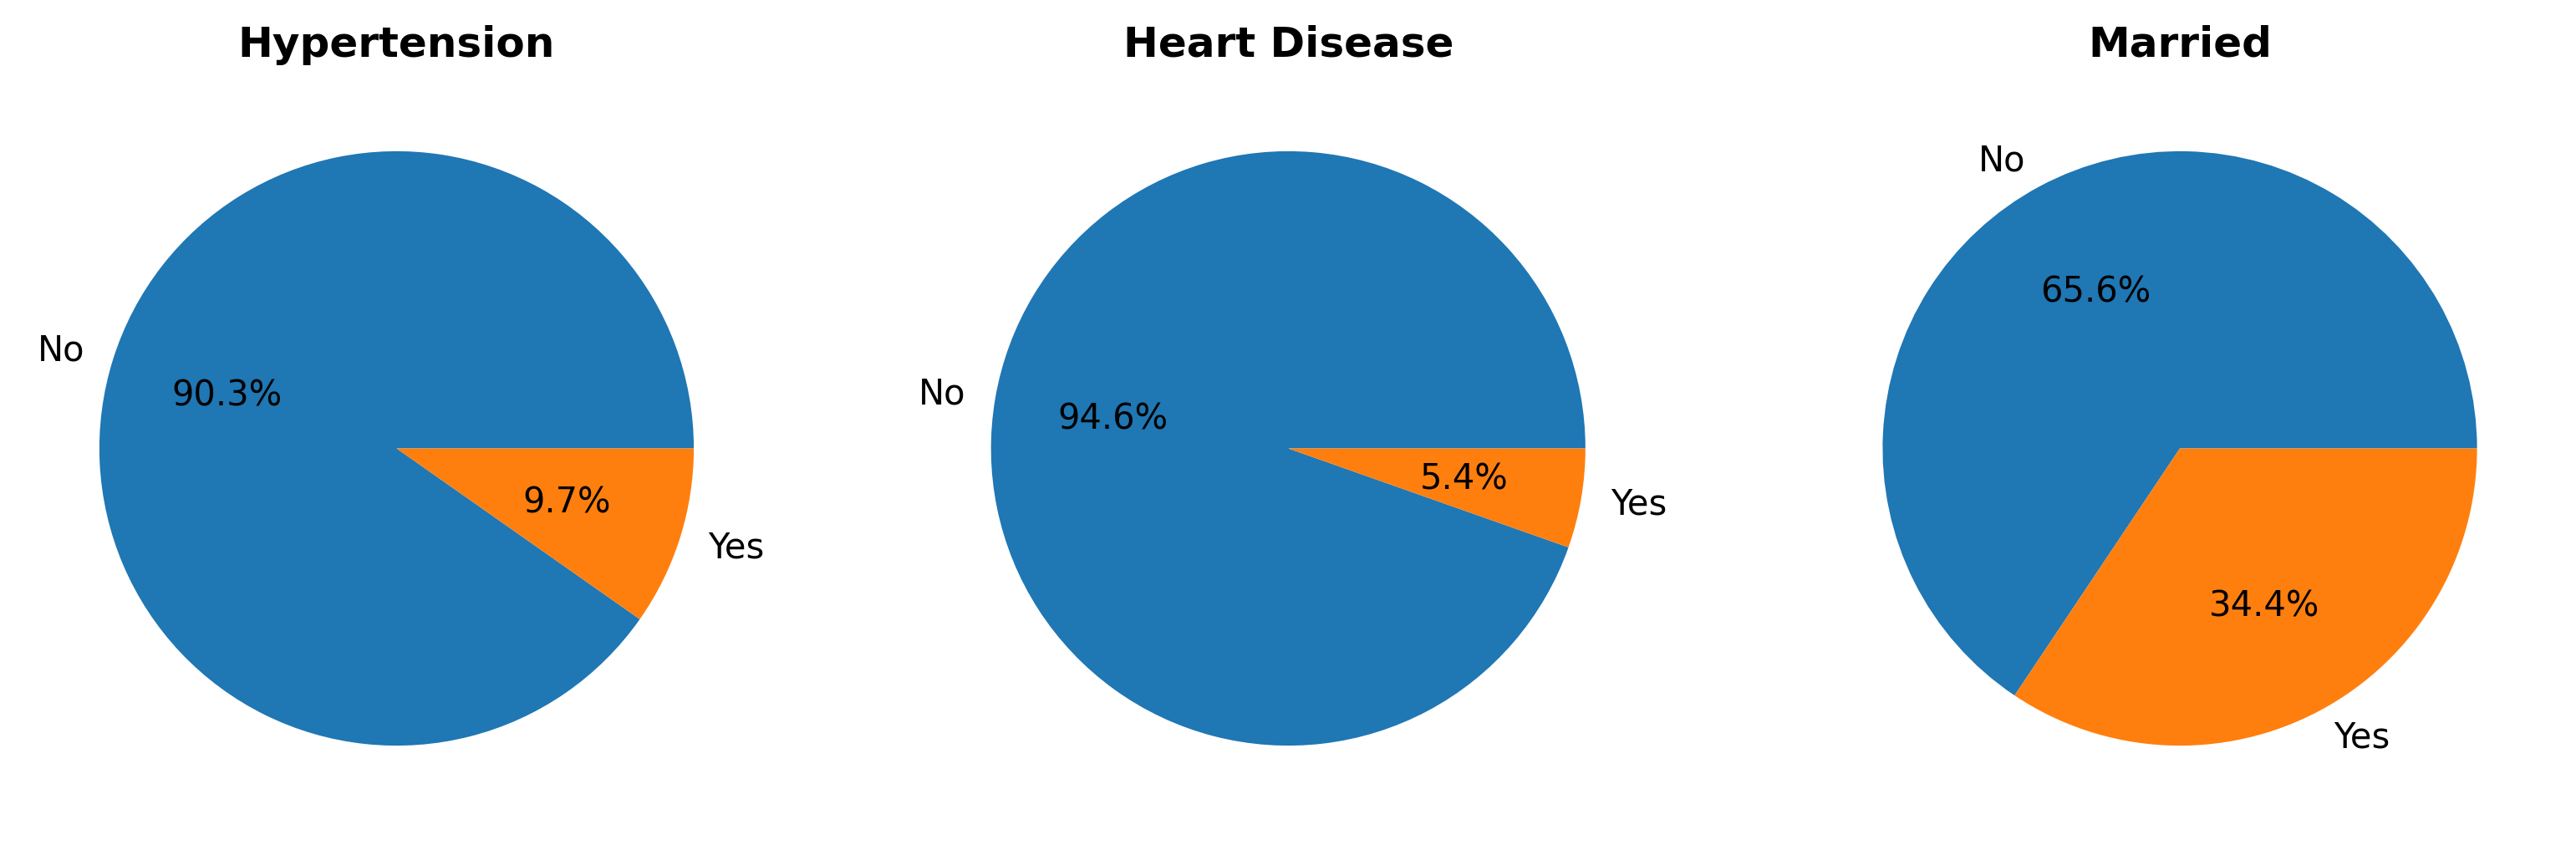

In [14]:
fig, (p1,p2,p3) = plt.subplots(1,3, figsize=(13, 6), dpi=300)

propotion = df['hypertension'].value_counts()
names = ['No','Yes']
p1.pie(propotion, labels=names, autopct='%1.1f%%')
p1.set_title('Hypertension', fontweight='bold')

propotion = df['heart_disease'].value_counts()
names = ['No','Yes']
p2.pie(propotion, labels=names, autopct='%1.1f%%')
p2.set_title('Heart Disease', fontweight='bold')

propotion = df['ever_married'].value_counts()
names = ['No','Yes']
p3.pie(propotion, labels=names, autopct='%1.1f%%')
p3.set_title('Married', fontweight='bold')

In this above plot you can see that
1. **Hypertension:** Only 9.2% of all the people have Hypertension problem.
2. **Heart Disease:** About 95.0% of all the people do not have Heart Disease problem.
3. **Married:** About 34.7% are married.


Text(0.5, 1.0, 'Proportion for stroke column')

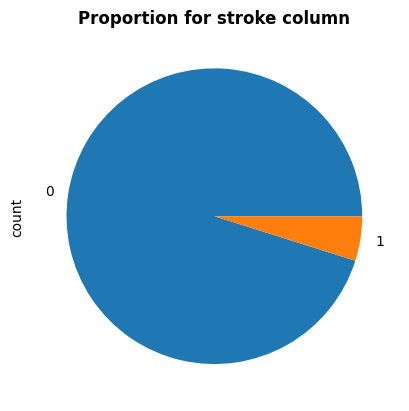

In [15]:
df['stroke'].value_counts().plot(kind='pie')
plt.title('Proportion for stroke column', fontweight='bold')

Here you can see that the `data is imbalanced`, specially since we are focussing on stroke detection we have very less data for people you got stroke.

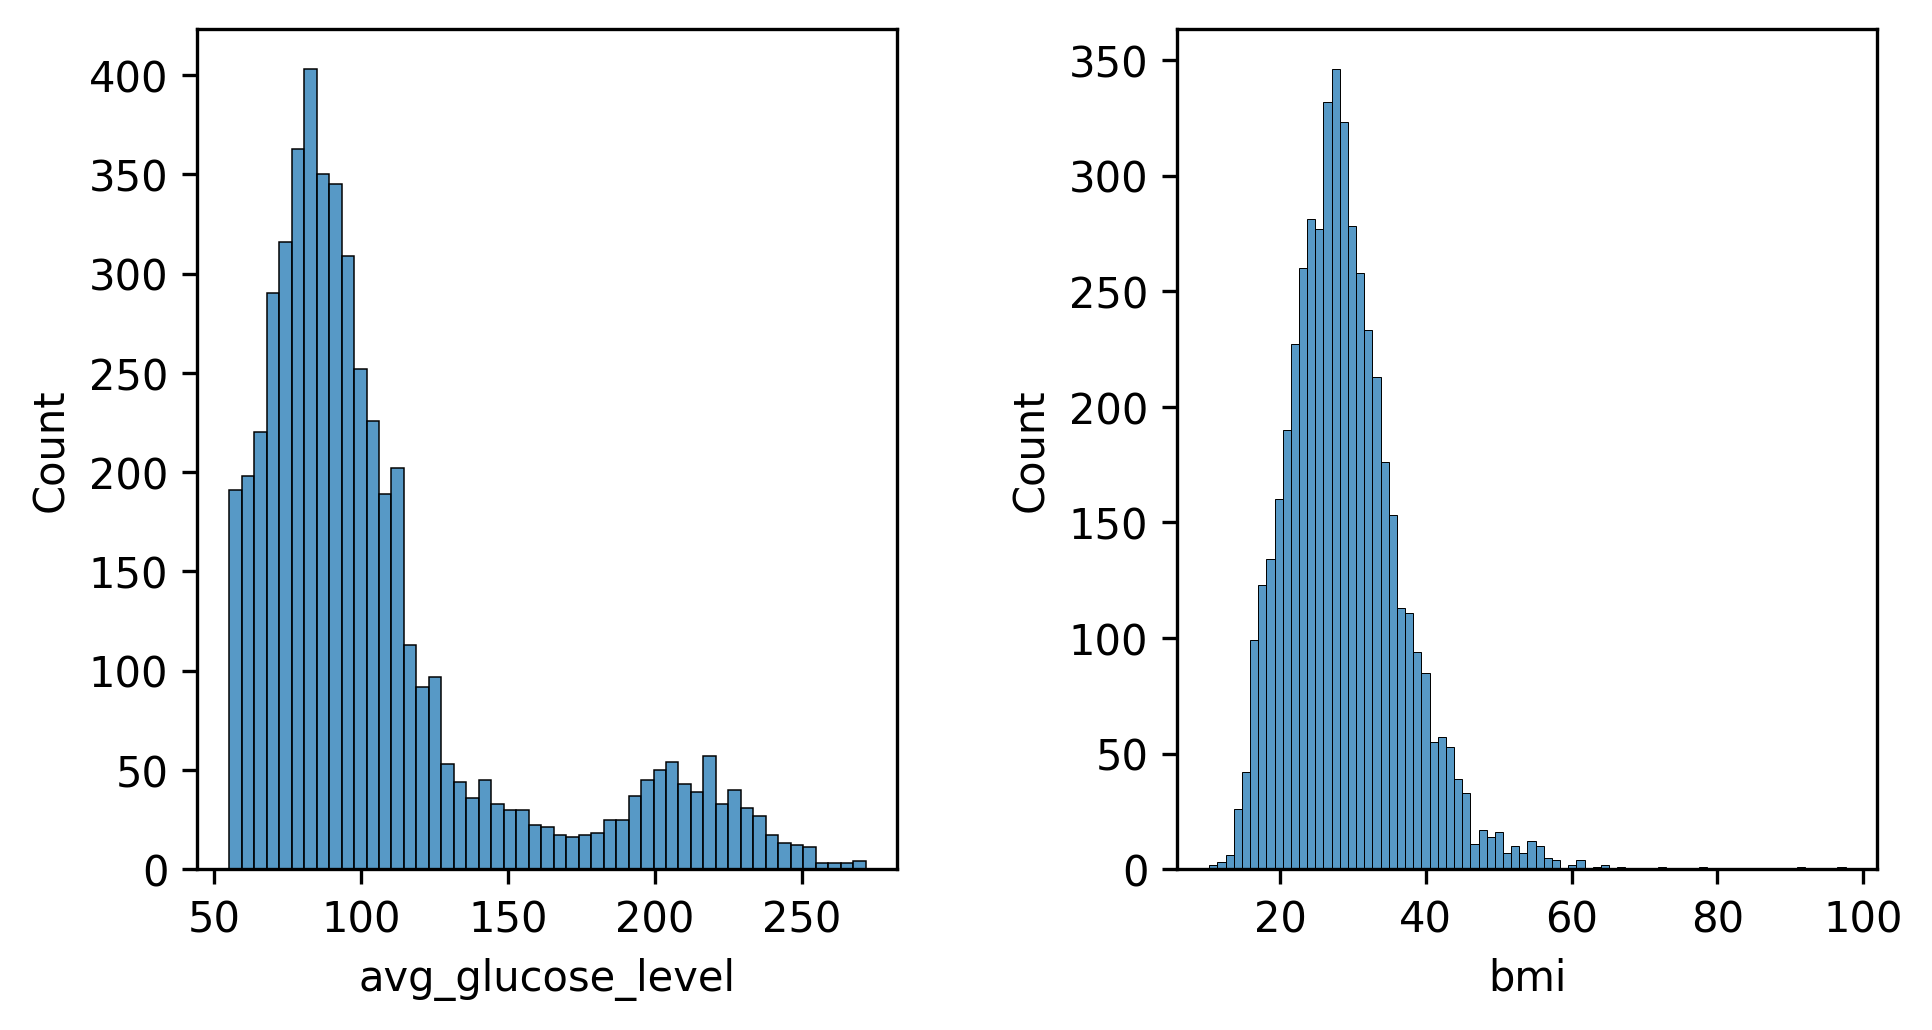

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), dpi=300)

sns.histplot(data=df, x="avg_glucose_level", ax=ax1)
sns.histplot(data=df, x="bmi", ax=ax2)
plt.subplots_adjust(left=0.1, right=0.8, top=0.8, bottom=0.1, wspace=0.4)

plt.show()

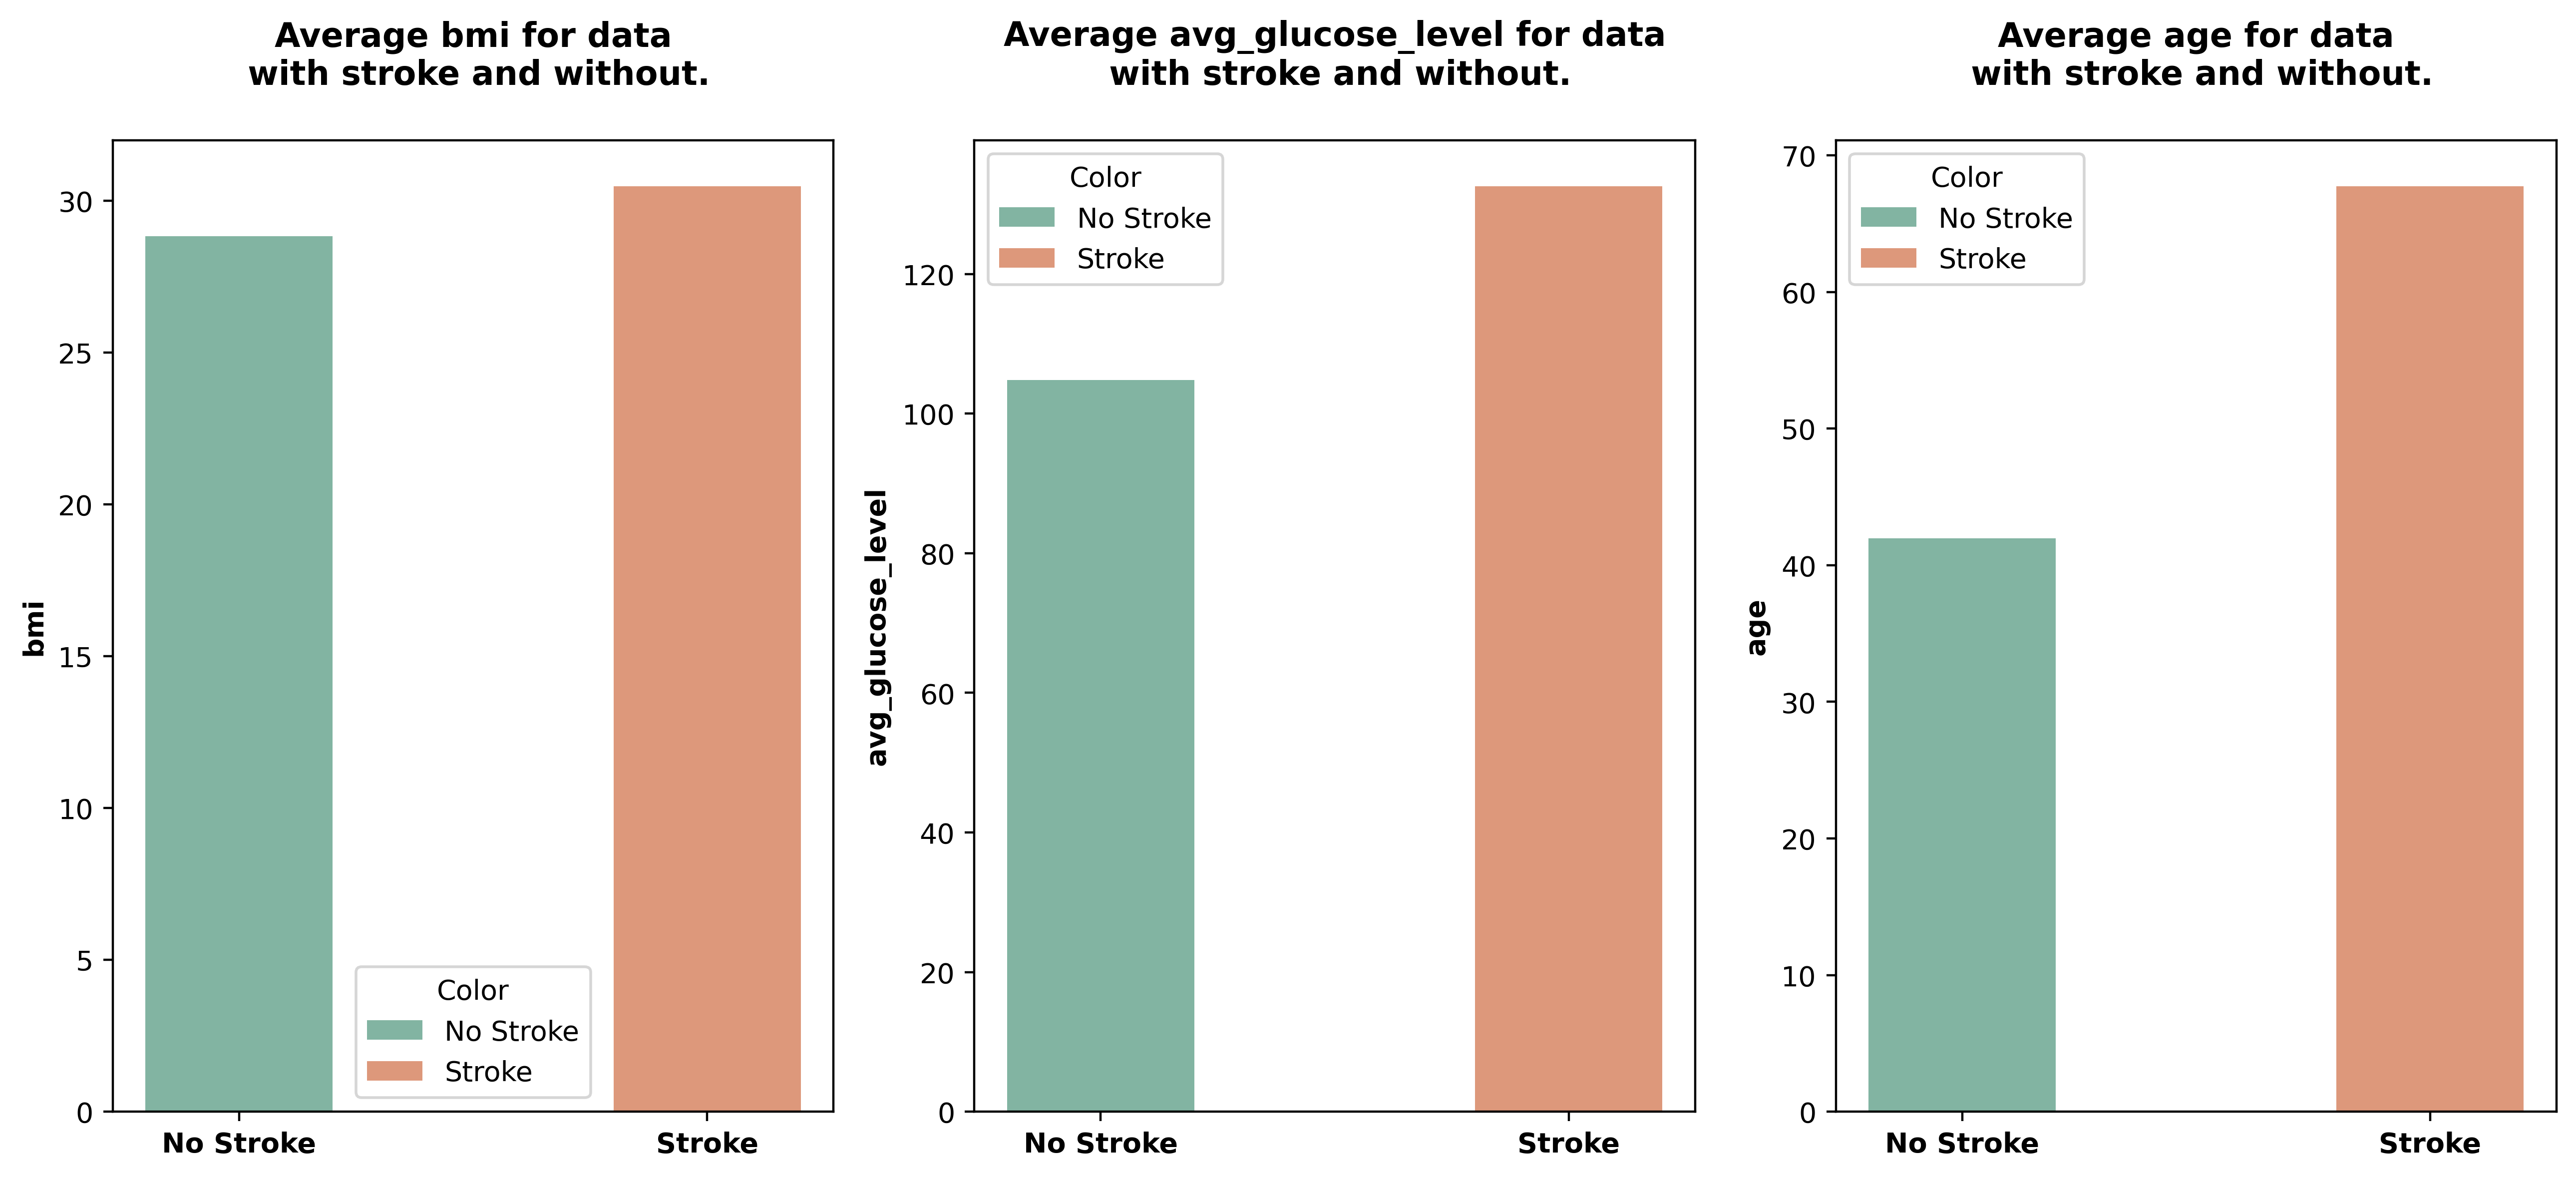

In [17]:
avg_of_numerical_cols = df.groupby('stroke')[['bmi', 'avg_glucose_level', 'age']].mean().reset_index()
names = ['No Stroke',  'Stroke']
colors = ['#82b4a2',   '#dd987b']
barwidth = 0.4

fig, p = plt.subplots(1, 3, figsize=(13, 6), dpi=400)

for i, col in enumerate(['bmi', 'avg_glucose_level', 'age']):
    x = avg_of_numerical_cols['stroke']
    y = avg_of_numerical_cols[col]


    p[i].bar(x,  y, label=names,  color =  colors, width =  barwidth, capstyle='round')
    p[i].set_title(f'Average {col} for data\n with stroke and without.', fontweight ='bold', pad  =20)
    p[i].set_ylabel(col , fontweight='bold')
    p[i].set_xticks(x)
    p[i].set_xticklabels(names, fontweight='bold')
    p[i].legend(title='Color'  )


plt.subplots_adjust(left=0.0, right=2.4, top=1, bottom=0.1, wspace=0.5)
plt.tight_layout()
plt.show()

Here mainly we need to focus on both 🟠 `orange` and 🟢 `green` bar.
In this graph we try to find relationship between numerical columns and their effect on having stroke. here we learn that

Features that `have less impact` on our target label are:
1. **bmi**

Features which `have significant impact` on our target label are:
1. **avg_glucose_level**
2. **age**

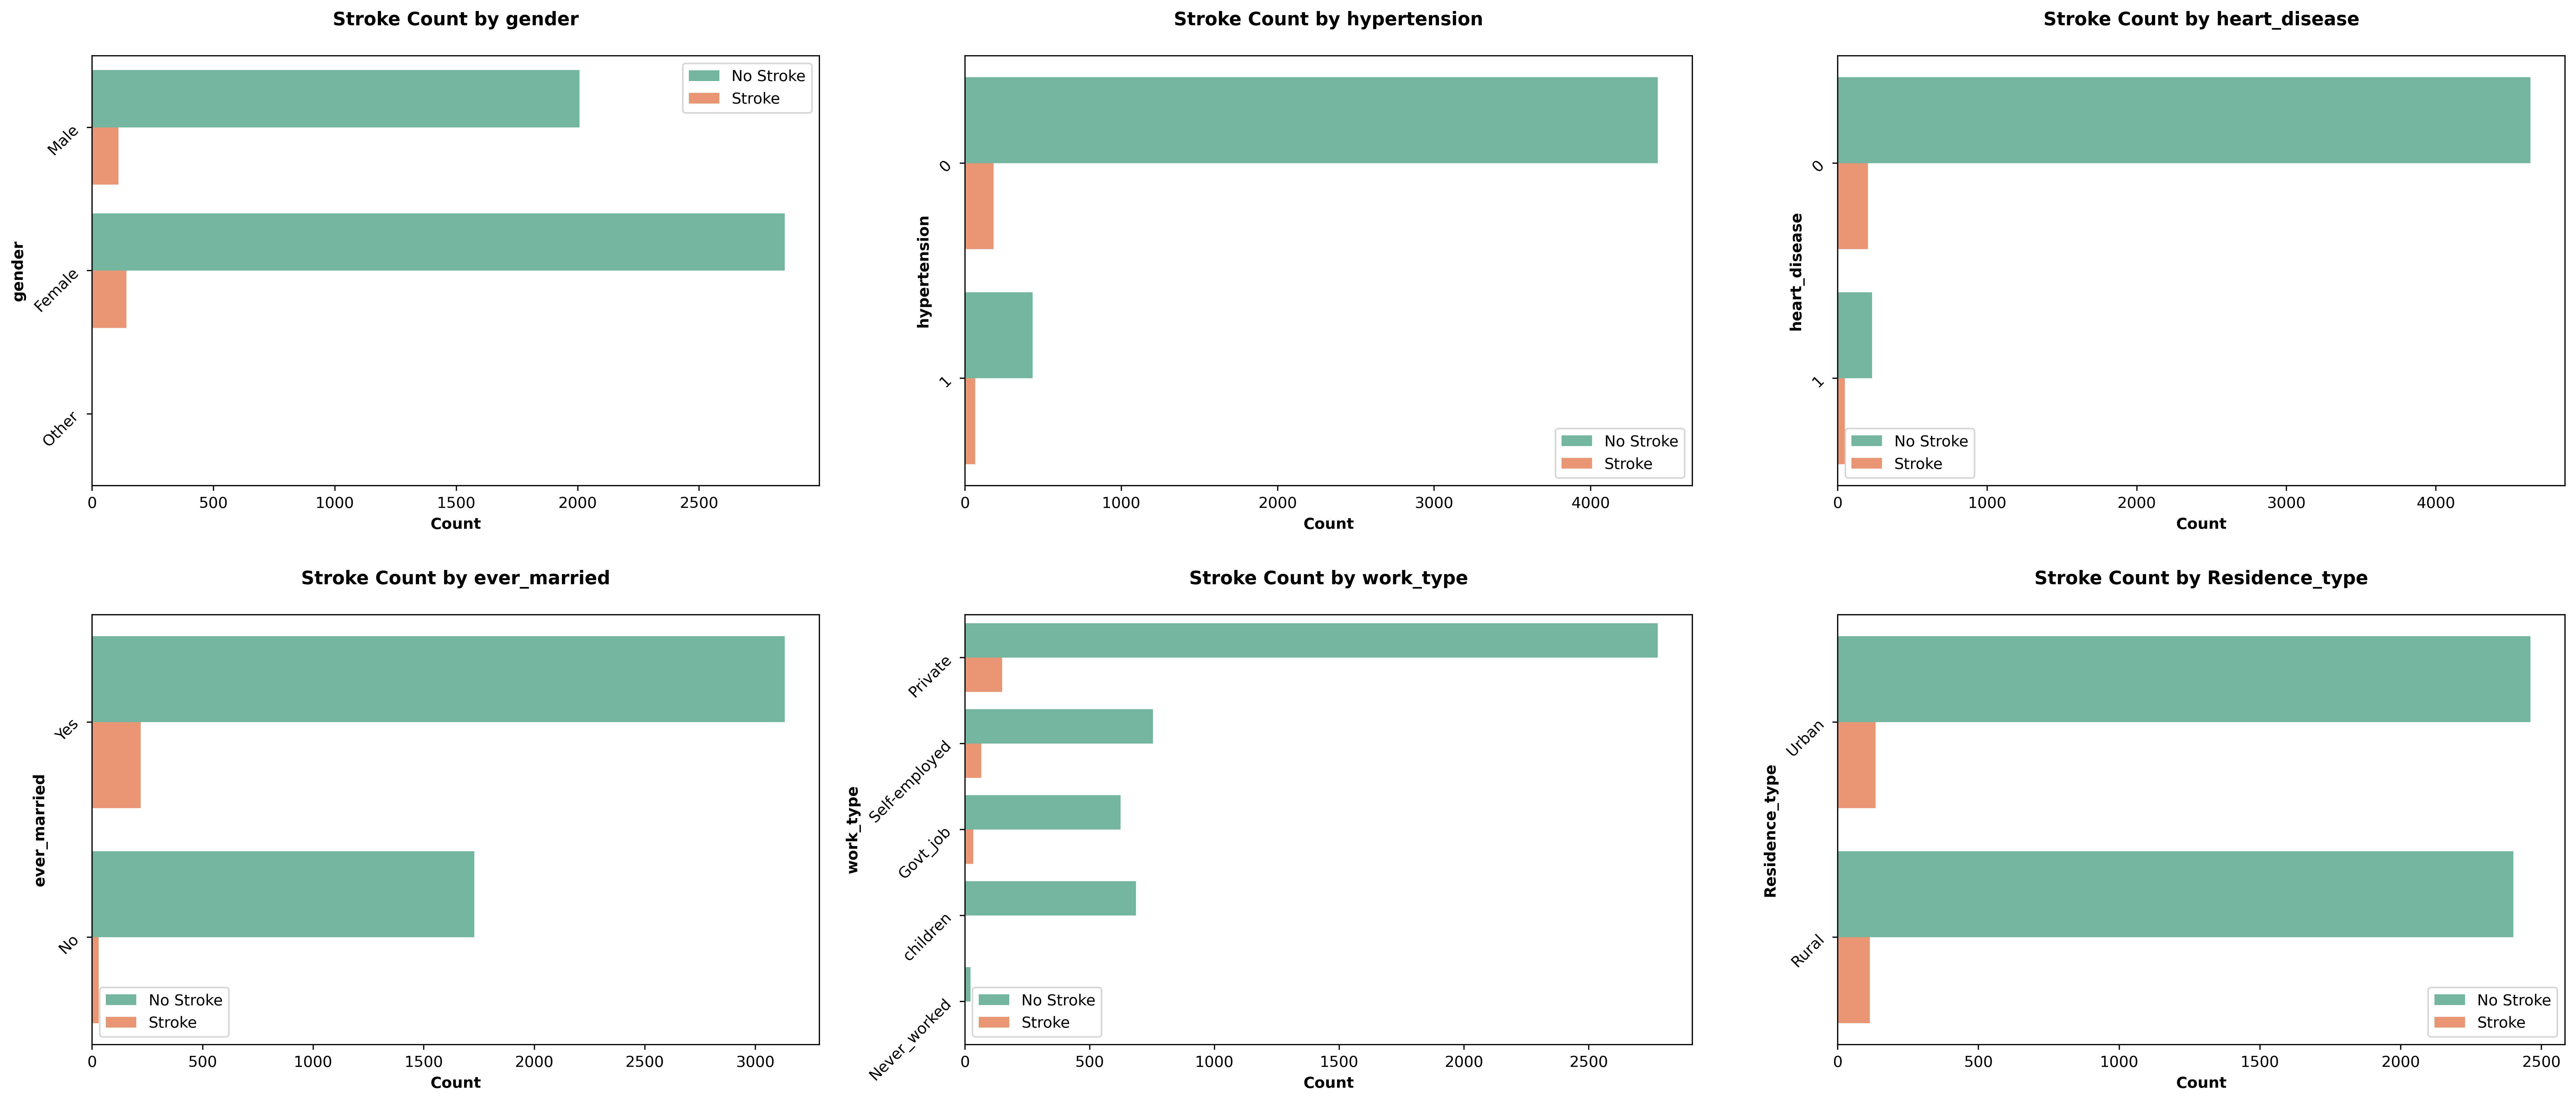

In [18]:
column_names = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type']

plt.figure(figsize=(25, 18), dpi=400)

for index, columns in enumerate(column_names):
    plt.subplot(2, 3, index+1)
    sns.countplot(y=columns, data=df, palette='Set2', hue='stroke')
    plt.legend(labels=['No Stroke', 'Stroke'])
    plt.title(f'Stroke Count by {columns}', fontweight='bold', pad=20)
    plt.ylabel(columns, fontweight='bold')
    plt.xlabel('Count', fontweight='bold')
    # plt.gca().set_yticklabels(df['work_type'], rotation=45)
    plt.yticks(rotation=45)


plt.subplots_adjust(hspace=0.3)
plt.subplots_adjust(left=0.1, right=1, top=0.6, bottom=0.1, wspace=0.2)

plt.show()


([0, 1, 2, 3],
 [Text(0, 0, 'formerly smoked'),
  Text(0, 1, 'never smoked'),
  Text(0, 2, 'smokes'),
  Text(0, 3, 'Unknown')])

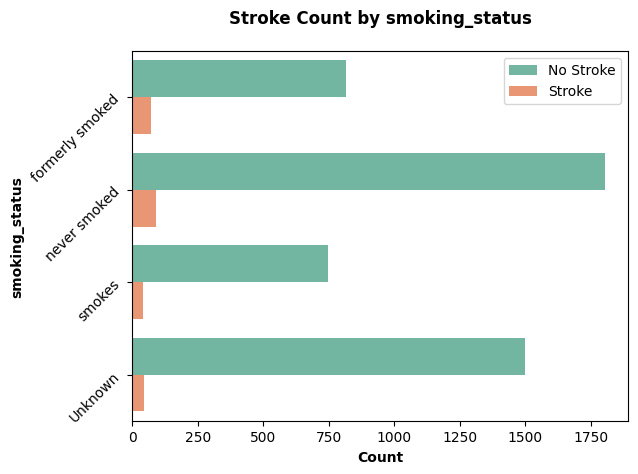

In [19]:
    # plt.subplot(2, 3, index+1)
columns = 'smoking_status'
sns.countplot(y=columns, data=df, palette='Set2', hue='stroke')
plt.legend(labels=['No Stroke', 'Stroke'])
plt.title(f'Stroke Count by {columns}', fontweight='bold', pad=20)
plt.ylabel(columns, fontweight='bold')
plt.xlabel('Count', fontweight='bold')
# plt.gca().set_yticklabels(df['work_type'], rotation=45)
plt.yticks(rotation=45)

Here mainly we need to focus on the 🟠 `orange` bar.
In this graph we try to find relationship between non numerical columns and their effect on having stroke. here we learn that

Features that `have less impact` on our target label are:
1. **gender**
2. **Resident_type**

Features which `have significant impact` on our target label are:
1. **hypertension**
2. **heart_desease**
3. **ever_married**
4. **work_type**

🤔 Let's confirm this using heatmap of correlation metrix

<Axes: >

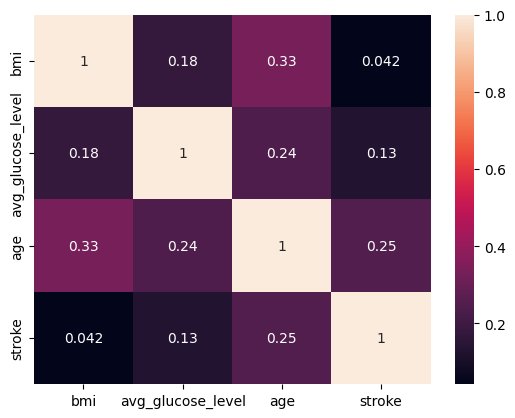

In [20]:
df_correlation = df[['bmi', 'avg_glucose_level', 'age','stroke']]
corr = df_correlation.corr()
sns.heatmap(corr,annot=True)

Here if you check against `stroke` and our three numerical columns you can see that value for `age:0.25` and `average_glucose_level:0.13` are more closer to 1 but `bmi:0.042` is significantlly lower. Which confirms our earlier finding.

<a id='thoughts'></a>
## 💭 <span style="color: #20479b; font-weight: bold;">My thoughts on the dataset</span>

As per my initial Data Exploration,
- I can see that the dataset big enough to build a ML model.
- This dataset consits of null values in   `bmi` column. Which I can delete it as it negligible rows of data and the bmi cannot be `null`.
- I will be droping column `id` as we do not need identity column while building a prediction model as will bring the accuracy down.
- We do have very less data for people who got stroke than in comparison to people to did not. Which makes it little imbalanced, so I will oversample the data.
- columns `bmi`, `gender` and `resident_type` have less impact on the our target label
- Having said that the still have slight impact. Hence I will not delete them.
- Other than that the data looks pretty clean and I may not have to do a lot of data cleaning.
- As I will have to train the model and then later test it, I will be splitting the data into two parts. Train and Test split.



Considering all these above points, I will be following the below steps to 

**⚙️ pre-process**
1. ❎ Drop all the rows containing `null` values
2. ❎ Drop columns `id`
3. ➗ Split train and test data
    - Doing it before testing or 
    - to avoid data Scalling and oversampling.

**🔧 feature Engineer**
1. ⚖️ Scalling the numerical and categorical labels

2. 📈 Oversampling the data for stroke = 1, Because of two main reasons.
    - Our focus is on stroke detection and data for people who have stroke is very less.
    - We do not have to worry about data size as well here, since it's not very huge.

<a id='processing' ></a>
## ⚙️ <span style="color: #20479b; font-weight: bold;">Pre-processing the data</span>


1. ❎ Drop all the rows containing `null` values.

In [21]:
df.dropna(inplace=True)

In [22]:
print("Number of rows.   :", df.shape[0])
print("="*30)

df.isnull().sum()

Number of rows.   : 4909


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

2. ❎ Drop columns `id`.

In [23]:
df.drop("id",axis=1,inplace=True)
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


3. ➗ Split train and test dataframe

In [24]:
x = df.drop(['stroke'],axis=1)
y = df['stroke']

# x_train_df,  x_test_df,   y_train_df,  y_test_df = sklearn.model_selection.train_test_split(  x , y  ,  test_size=0.2,  shuffle=True,random_state  =  40)

print("df size      :",df.shape)
# print("df train size:",x_train_df.shape)
# print("df test size :",x_test_df.shape)

df size      : (4909, 11)


<a id='feature' ></a>
## 🔧 <span style="color: #20479b; font-weight: bold;">Feature Engineering</span>


1. ⚖️ Scalling the numerical and categorical labels

In [25]:
col_num = x.select_dtypes(   include  =  ['int64'   ,  'float64'  ]).columns.tolist()
col_cat = x.select_dtypes( include  =  [ "object"] ).columns.tolist()
col_all = x.select_dtypes( include  = ['int64'   ,  'float64', 'object'  ]   ).columns.tolist()

std_scaler = sklearn.preprocessing.StandardScaler()
# one_hot_enc = sklearn.preprocessing.OneHotEncoder(sparse_output=False, dtype=np.int64)

ct = sklearn.compose.ColumnTransformer([('std_scaler', std_scaler,col_num)],remainder='passthrough')
# ,('one_hot_enc', one_hot_enc,col_cat)]
ct.fit(x)
ct.set_output(transform="pandas")
x_train_df = ct.transform(x)
# x_train_df.head(5)

x_train_df.head(5)

,std_scaler__age,std_scaler__hypertension,std_scaler__heart_disease,std_scaler__avg_glucose_level,std_scaler__bmi,remainder__gender,remainder__ever_married,remainder__work_type,remainder__Residence_type,remainder__smoking_status
0,1.070138,-0.318067,4.381968,2.777698,0.981345,Male,Yes,Private,Urban,formerly smoked
2,1.646563,-0.318067,4.381968,0.013842,0.459269,Male,Yes,Private,Rural,never smoked
3,0.272012,-0.318067,-0.228208,1.484132,0.701207,Female,Yes,Private,Urban,smokes
4,1.602222,3.143994,-0.228208,1.549193,-0.623083,Female,Yes,Self-employed,Rural,never smoked
5,1.690903,-0.318067,-0.228208,1.821368,0.013595,Male,Yes,Private,Urban,formerly smoked


In [26]:
x.rename( columns = {
                                'std_scaler__age':'age',
                                'std_scaler__hypertension':'hypertension',
                                'std_scaler__heart_disease': 'heart_disease',
                                'remainder__ever_married':'ever_married' ,
                                'remainder__work_type':'work_type' ,   
                                'std_scaler__avg_glucose_level':'avg_glucose_level' ,
                                'remainder__smoking_status':'smoking_status',
                                'std_scaler__bmi':'bmi' ,
                                'remainder__Residence_type':'Residence_type' ,
                                'remainder__gender':'gender' }
                                ,inplace=True)
x.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked


for the categorical values I will replace the categories with values

In [27]:
print(   x['ever_married'].unique())
print(  x['work_type'].unique())
print(   x['smoking_status'].unique())
print(   x['Residence_type'].unique())
print(   x['gender'].unique())

['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
['Urban' 'Rural']
['Male' 'Female' 'Other']


In [28]:
x['ever_married'] = x['ever_married'].replace({
                                                                    'No':0,
                                                                    'Yes': 1
                                                                })
x['work_type'] = x['work_type'].replace({
                                                                    'children':0,
                                                                    'Private': 1,
                                                                    'Self-employed': 2,
                                                                    'Govt_job': 3,
                                                                    'Never_worked': 4                                                              
                                                                })
x['smoking_status'] = x['smoking_status'].replace({
                                                                    'Unknown':0,
                                                                    'never smoked': 1,
                                                                    'formerly smoked': 2,
                                                                    'smokes': 3
                                                                })
x['Residence_type'] = x['Residence_type'].replace({
                                                                    'Rural':0,
                                                                    'Urban': 1
                                                                })
x['gender'] = x['gender'].replace({
                                                                    'Other':0,
                                                                    'Female': 1,
                                                                    'Male': 2
                                                                })
x.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,2,67.0,0,1,1,1,1,228.69,36.6,2
2,2,80.0,0,1,1,1,0,105.92,32.5,1
3,1,49.0,0,0,1,1,1,171.23,34.4,3
4,1,79.0,1,0,1,2,0,174.12,24.0,1
5,2,81.0,0,0,1,1,1,186.21,29.0,2


In [29]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   int64  
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   int64  
 5   work_type          4909 non-null   int64  
 6   Residence_type     4909 non-null   int64  
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 421.9 KB


2. 📈 Oversampling the data

In [31]:
mod_smote =  SMOTE(  )
x_train_smot, y_train_smot   =    mod_smote.fit_resample(x,y)

print("x_train_smot size:",x_train_smot.shape)
print("y_train_smot size :",y_train_smot.shape)


x_train_smot size: (9400, 10)
y_train_smot size : (9400,)


In [33]:
type(x_train_smot)

pandas.core.frame.DataFrame

In [34]:
type(y_train_smot)

pandas.core.series.Series

In [1064]:
y_smot.value_counts(    )

stroke
1    4700
0    4700
Name: count, dtype: int64

We can see that it had added more synthetic data to our dataset, which is good for us.

<a id='model'></a>
## 🤖 <span style="color: #20479b; font-weight: bold;">Model Training</span>

In [1065]:
log_reg = sklearn.linear_model.LogisticRegression(max_iter=1200)
svc = sklearn.svm.SVC()
ran_for_cls =  sklearn.ensemble.RandomForestClassifier(random_state=1234)

x_train_smot,x_test_df,y_train_smot,y_test_df = train_test_split(x_smot,y_smot,test_size=0.3,random_state=42)

log_reg.fit(x_train_smot,y_train_smot)
svc.fit(x_train_smot,y_train_smot)
ran_for_cls.fit(x_train_smot,y_train_smot)


RandomForestClassifier(random_state=1234)

So I will be using 3 models
1. Linear Regression
2. Support Vector Classifier
3. Random Forest Classifier

I am fitting the model for `x_train` and `y_train`
Then, predicting target label for the `x_test` dataset.

<a id='assess'></a>
## ✅ <span style="color: #20479b; font-weight: bold;">Model Assesment</span>

In [1066]:
y_pred_log_reg = log_reg.predict(x_test_df)
result_log_reg = sklearn.metrics.classification_report(y_test_df,y_pred_log_reg)
print('Logistic Regression')
print('='*53)
print(result_log_reg)

y_pred_svc = svc.predict(x_test_df)
result_svc = sklearn.metrics.classification_report(y_test_df,y_pred_svc)
print('Support Vector Classifier')
print('='*53)
print(result_svc)

y_pred_ran_for_cls = ran_for_cls.predict(x_test_df)
result_ran_for_cls = sklearn.metrics.classification_report(y_test_df,y_pred_ran_for_cls)
print('Random Forest Classifier')
print('='*53)
print(result_ran_for_cls)


Logistic Regression
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1407
           1       0.81      0.82      0.82      1413

    accuracy                           0.81      2820
   macro avg       0.81      0.81      0.81      2820
weighted avg       0.81      0.81      0.81      2820

Support Vector Classifier
              precision    recall  f1-score   support

           0       0.80      0.73      0.76      1407
           1       0.75      0.82      0.78      1413

    accuracy                           0.77      2820
   macro avg       0.78      0.77      0.77      2820
weighted avg       0.78      0.77      0.77      2820

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      1407
           1       0.92      0.97      0.95      1413

    accuracy                           0.94      2820
   macro avg       0.95      0.94      0.94      2820
wei

Here I will compare the all models and try to select the best model out of the three
1. Accuracy score is best for svc model i.e. 94.
2. We can't just rely on the accuracy score.
3. Precision score best in svc model.
4. Also if you check the weighted avg and macro avg we can confirm that in this case `Support Vector Classifier model performed the best`.

Let's tune some hyper parameters and try to find the best performing parameters for this model.  
I will use scikit learn `GridSearchCV`.  
I will also set the cross validation param to 5 as I want it to cross validate the values 6 times and give me an average.

In [1067]:
params = {'C':[0.1, 0.5, 1, 5, 10],'max_iter':[1200,1000,1500]}
grid_ser_cv = GridSearchCV(log_reg,params,cv=5,return_train_score=False)
grid_ser_cv.fit(x_train_smot,y_train_smot)
df_results = pd.DataFrame(grid_ser_cv.cv_results_)
df_results[['param_C','mean_test_score']]
df_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.757723,0.506527,0.008024,0.003084,0.1,1200,"{'C': 0.1, 'max_iter': 1200}",0.809271,0.81079,0.803191,0.826748,0.787234,0.807447,0.012757,13
1,2.830316,0.296225,0.012443,0.003395,0.1,1000,"{'C': 0.1, 'max_iter': 1000}",0.809271,0.81079,0.803191,0.826748,0.787234,0.807447,0.012757,13
2,3.030229,0.381049,0.008295,0.004898,0.1,1500,"{'C': 0.1, 'max_iter': 1500}",0.809271,0.81079,0.803191,0.826748,0.787234,0.807447,0.012757,13
3,3.212296,0.544983,0.012442,0.007668,0.5,1200,"{'C': 0.5, 'max_iter': 1200}",0.813070,0.81383,0.805471,0.823708,0.791793,0.809574,0.010612,10
4,3.258121,0.740326,0.010410,0.003274,0.5,1000,"{'C': 0.5, 'max_iter': 1000}",0.813070,0.81383,0.805471,0.823708,0.791793,0.809574,0.010612,10


selecting the best parameters out of all.

In [1068]:
grid_ser_cv.best_params_

{'C': 1, 'max_iter': 1200}

Comparing the models with the best params and without parameters

In [1069]:
log_reg_hp = sklearn.linear_model.LogisticRegression(   C=0.5,   max_iter= 1200)


log_reg_hp.fit(x_train_smot,y_train_smot)
rs = log_reg_hp.predict(x_test_df)

In [1070]:
y_pred_log_reg_hp = log_reg_hp.predict(x_test_df)
result_log_reg_hp = sklearn.metrics.classification_report(y_test_df,y_pred_log_reg_hp)
print('Logistic Regression with hyperparameter')
print('='*53)
print(result_log_reg_hp)


print('Logistic Regression without hyperparameter')
print('='*53)
print(result_log_reg)

Logistic Regression with hyperparameter
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1407
           1       0.81      0.82      0.81      1413

    accuracy                           0.81      2820
   macro avg       0.81      0.81      0.81      2820
weighted avg       0.81      0.81      0.81      2820

Logistic Regression without hyperparameter
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1407
           1       0.81      0.82      0.82      1413

    accuracy                           0.81      2820
   macro avg       0.81      0.81      0.81      2820
weighted avg       0.81      0.81      0.81      2820



Here we can see that performance has decreased instead of inscrease. Hence the best params are the defaults one's.

<a id='conclusion'></a>
## 💡 <span style="color: #20479b; font-weight: bold;">Conclusion</span>

To summarize everythin we did
- we started with loading the dataset
- In our eda we noticed that
    - id column was unnessary.
    - bmi column had null values.
    - dataset was pretty imbalanced.
- cleaned the data, by deleting null rows, dropping id column, and split the data to avoid.
- And then we scaled the numerical and categorical values.
- oversampled the data using smote.

We build model using 3 different methods and compared them.
As per the valuation metrics we found Logistic regression provided the best output.
I was able to build a good ML model to detect a stroke prediction with accuracy of 0.96.
I tried tuning the parameters to check if there are any improvements.
But we did not see any improvements, hence we can conclude that the default parameters worked best for this model.

We this model in place now my company can use this model to take inputs from the users and prompt them if there are chances of getting a stroke for them. This solves the problem that we stated before. 

I felt that if the data has more parametrics we could have improved more. Also `bmi` of a person does impact on the chances of getting an stroke, but in this dataset it did not show the signs of it. Hence it will be better if data collection is done even more accurately then I could have build a more accurate model.

